# Solving Poisson equation with skfem
- Codes: https://github.com/kinnala/scikit-fem/tree/master/skfem
- Docs: https://scikit-fem.readthedocs.io/en/latest/

## Installing

In [ ]:
pip install scikit-fem

## Poisson example
$$
\left\{\begin{array}{ll}
-\Delta \varphi=f & \text { in } \Omega \\
\varphi=0 & \text { on } \partial \Omega
\end{array}\right.
$$

In [1]:
from skfem import *
from skfem.visuals.matplotlib import draw, plot
from skfem.helpers import d, dd, ddd, dot, ddot, grad, dddot, prod
from skfem.assembly import BilinearForm, LinearForm

### Mesh and basis

In [2]:
m = MeshTri()

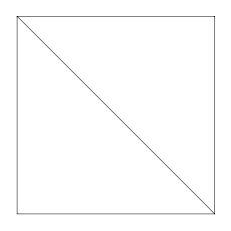

In [3]:
draw(m)

In [4]:
m.refine(2)

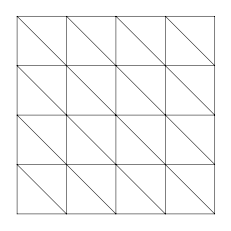

In [5]:
draw(m)

In [6]:
e = ElementTriP1()

In [7]:
basis = InteriorBasis(m, e)

In [8]:
basis.doflocs # loactions of degree of freedom

array([[0.  , 1.  , 0.  , 1.  , 0.5 , 0.  , 0.5 , 1.  , 0.5 , 0.25, 0.  ,
        0.75, 0.75, 1.  , 0.  , 0.25, 0.25, 1.  , 0.75, 0.25, 0.5 , 0.25,
        0.75, 0.5 , 0.75],
       [0.  , 0.  , 1.  , 1.  , 0.  , 0.5 , 0.5 , 0.5 , 1.  , 0.  , 0.25,
        0.  , 0.25, 0.25, 0.75, 0.75, 1.  , 0.75, 1.  , 0.25, 0.25, 0.5 ,
        0.5 , 0.75, 0.75]])

### Define forms

$$
(\nabla u, \nabla v)
$$

In [9]:
@BilinearForm
def laplace(u, v, w):
    return dot(grad(u), grad(v))

$$
(f, v)
$$
Set $f = 2$

In [10]:
@LinearForm
def right_load(v, w):
    f = 2
    return v * f

### Assemble

$$
Au=b
$$

In [11]:
A = asm(laplace, basis) # assemble

b = asm(right_load, basis) 

### Boundary

In [12]:
condense(A, b, D=m.boundary_nodes())

(<9x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 33 stored elements in Compressed Sparse Row format>,
 array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 6, 12, 15, 19, 20, 21, 22, 23, 24]))

### Solve

In [13]:
u = solve(*condense(A, b, D=m.boundary_nodes()))

In [14]:
u

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.140625 , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.0859375, 0.       , 0.       , 0.0859375, 0.       , 0.       ,
       0.       , 0.0859375, 0.109375 , 0.109375 , 0.109375 , 0.109375 ,
       0.0859375])

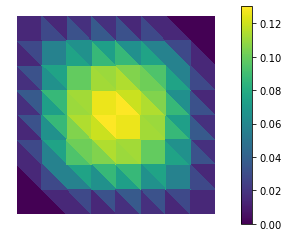

In [15]:
plot(basis, u, colorbar=True)

## Other codes

In [25]:
m = MeshTri.init_symmetric()

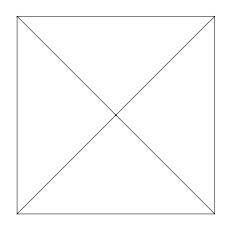

In [26]:
draw(m)

In [27]:
dofs = basis.find_dofs({
    'left': m.facets_satisfying(lambda x: x[0] == 0),
    'right': m.facets_satisfying(lambda x: x[0] == 1),
    'top': m.facets_satisfying(lambda x: x[1] == 1),
    'buttom': m.facets_satisfying(lambda x: x[1] == 0)
})

In [28]:
basis.dx

array([[0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.01041667, 0.01041667, 0.01041667],
       [0.

In [29]:
fbasis = FacetBasis(m, e)

In [30]:
fbasis

Interpolating result $u$

In [31]:
U = basis.interpolate(u)

In [32]:
U.grad

array([[[ 0.     ,  0.     ,  0.     ],
        [-0.34375, -0.34375, -0.34375],
        [ 0.     ,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.     ],
        [ 0.34375,  0.34375,  0.34375],
        [ 0.     ,  0.     ,  0.     ],
        [ 0.09375,  0.09375,  0.09375],
        [-0.125  , -0.125  , -0.125  ],
        [ 0.     ,  0.     ,  0.     ],
        [-0.125  , -0.125  , -0.125  ],
        [ 0.     ,  0.     ,  0.     ],
        [ 0.09375,  0.09375,  0.09375],
        [ 0.4375 ,  0.4375 ,  0.4375 ],
        [-0.34375, -0.34375, -0.34375],
        [ 0.4375 ,  0.4375 ,  0.4375 ],
        [-0.4375 , -0.4375 , -0.4375 ],
        [ 0.34375,  0.34375,  0.34375],
        [-0.4375 , -0.4375 , -0.4375 ],
        [-0.09375, -0.09375, -0.09375],
        [ 0.     ,  0.     ,  0.     ],
        [ 0.125  ,  0.125  ,  0.125  ],
        [ 0.     ,  0.     ,  0.     ],
        [ 0.125  ,  0.125  ,  0.125  ],
        [-0.09375, -0.09375, -0.09375],
        [ 0.34375,  0.34375,  0.34375],
